# Applicability of 160MeV gantry systems for proton therapy

160MV corresponds to a depth of 18 cm

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us import data to evaluate the potential of a 160MeV system.

We downloaded cancer incidence rates in the US from https://seer.cancer.gov/popdata/download.html. According to the cancer categories in this list, we assign an applicability value for proton therapy based on published results. By no way, this doesn't mean that all cancers of a category will be treated with proton therapy. However, we are interested in the fraction among these cases that is applicable for a reduced range proton therapy. 

In order to determine this, we estimate the depth in an organ in the body, and assign a second category variable telling us if the cancer could be treated with a range of 18cm. The variable takes 3 values: YES (18 cm is enough), MAYBE (no sure about 18cm) and NO (18 cm is not enough, or cancer cannot be treated with PT).

We group all results in a data frame for further analysis.

In [154]:
# import data per sex for all US 
# downlodaded from https://seer.cancer.gov/popdata/download.html 
df_newcases = pd.read_excel (r'D:\clinical\databases\NewCaseEstimates_US.xlsx',sheet_name='All US',skiprows=6) 
df_deaths = pd.read_excel (r'D:\clinical\databases\DeathEstimates_US.xlsx',sheet_name='All US',skiprows=6) 

# change structure to prepare the dataframes for the join
df_newcases.set_index('Cancer Type',inplace=True)
df_newcases.drop(['Both sexes combined'],axis=1,inplace=True) # let's recalculate the sum ourselves
df_newcases.rename(columns={'Male': 'Male new cases','Female': 'Female new cases'}, inplace=True)

df_deaths.set_index('Cancer Type',inplace=True)
df_deaths.drop(['Both sexes combined'],axis=1,inplace=True) # let's recalculate the sum ourselves
df_deaths.rename(columns={'Male': 'Male deaths','Female': 'Female deaths'}, inplace=True)

# join the 2 dataframes
df_all = df_newcases.join(df_deaths)

# cleaning data
df_all.fillna(0,inplace=True)


#########################################
# import table about applicability for PT

df_PT_applicability = pd.read_excel (r'D:\clinical\databases\PT_applicability_vs_cancer_type.xlsx',skiprows=2)
df_PT_applicability.set_index('Cancer type',inplace=True)


# join with the df from the cancer statistics
df_all = df_all.join(df_PT_applicability)

# remove row with all cancer types combined
df_all.drop('All cancer types combined',axis=0,inplace=True)

df_all.head()

,Female new cases,Male new cases,Female deaths,Male deaths,PT applicable?,R=18cm PT applicable?
Cancer Type,,,,,,
Acute lymphocytic leukemia,2650.0,3280.0,650.0,850.0,NO,NO
Acute myeloid leukemia,9800.0,11650.0,4630.0,6290.0,NO,NO
"Anus, anal canal and anorectum",5530.0,2770.0,760.0,520.0,MAYBE,MAYBE
Bones and joints,1470.0,2030.0,700.0,960.0,YES,YES
Brain and other nervous system,10410.0,13410.0,7850.0,9910.0,YES,YES


Let us group male and female groups and compute the death rate for each cancer.

We sort the cancers by incidence rate.

,Female new cases,Male new cases,Female deaths,Male deaths,PT applicable?,R=18cm PT applicable?,total deaths,total new cases,death rate [%]
Cancer Type,,,,,,,,,
Digestive system,141950.0,186080.0,68350.0,97110.0,YES,MAYBE,165460.0,328030.0,50.440508
Genital system,109000.0,186290.0,33100.0,32440.0,MAYBE,MAYBE,65540.0,295290.0,22.195130
Breast,268600.0,2670.0,41760.0,500.0,YES,YES,42260.0,271270.0,15.578575
Respiratory system,116070.0,130370.0,67130.0,80380.0,YES,YES,147510.0,246440.0,59.856354
Lung and bronchus,111710.0,116440.0,66020.0,76650.0,YES,YES,142670.0,228150.0,62.533421


<Figure size 432x288 with 0 Axes>

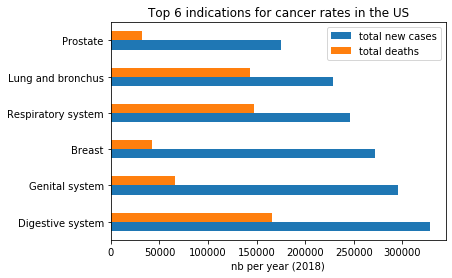

<Figure size 432x288 with 0 Axes>

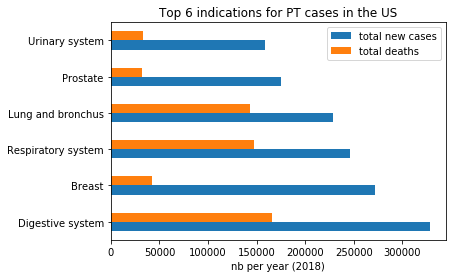

In [175]:
# Calculate new columns to evaluate the potential of proton therapy at R=18cm

df_all['total deaths'] = df_all['Male deaths'] + df_all['Female deaths']
df_all['total new cases'] = df_all['Male new cases'] + df_all['Female new cases']

df_all['death rate [%]'] = df_all['total deaths']/df_all['total new cases']*100

df_all.sort_values(by=['total new cases'],ascending=False,inplace=True)

# Plot cancer stats
plt.figure('cancer stats')
df_all.head(6).plot.barh(y=['total new cases','total deaths'])
plt.title('Top 6 indications for cancer rates in the US')
plt.xlabel('nb per year (2018)')
plt.ylabel('')

# Plot stats for PT
plt.figure('cancer stats PT')
df_all[df_all['PT applicable?'] == 'YES'].head(6).plot.barh(y=['total new cases','total deaths'])
plt.title('Top 6 indications for PT cases in the US')
plt.xlabel('nb per year (2018)')
plt.ylabel('')


# show new dataframe
df_all.head()

In order to determine the fraction of indications that could be treated with 160MeV, we calculate the total number of cases corresponding to potential proton therapy treatments. Out of these, we calculate those that require for certain ranges lower than 18cm and those that might be applicable below 18cm without certainty.

We see that depending on the case, <b><i> between 50% and 90% of the tumors treated in proton therapy require ranges below 18cm </b></i>.

In [157]:
# Calculate applicability

# calculate fraction of cases that are applicable for R=18cm among all PT cases
PT_applicable_sum = df_all[df_all['PT applicable?']=='YES']['total new cases'].sum()
PT_R18_applicable_sum_min = df_all[(df_all['R=18cm PT applicable?']=='YES') & (df_all['PT applicable?']=='YES')]['total new cases'].sum()
print('PT at 160MeV is applicable in min {:.2%} the overall PT cases'.format(PT_R18_applicable_sum_min/PT_applicable_sum))

# calculate fraction of cases that might be applicable for R=18cm among all PT cases
PT_R18_applicable_sum_max = df_all[((df_all['R=18cm PT applicable?']=='YES') | (df_all['R=18cm PT applicable?']=='MAYBE') & (df_all['PT applicable?']=='YES'))]['total new cases'].sum()
print('PT at 160MeV is applicable in max {:.2%} the overall PT cases'.format(PT_R18_applicable_sum_max/PT_applicable_sum))


PT at 160MeV is applicable in min 51.48% the overall PT cases
PT at 160MeV is applicable in max 88.90% the overall PT cases


Text(0, 0.5, '')

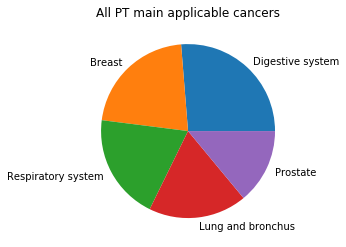

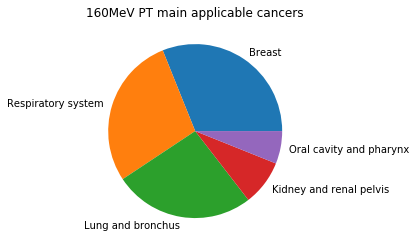

In [176]:
# plots

plt.figure('pie chart of all applicable cancers for PT')
df_all[df_all['PT applicable?']=='YES']['total new cases'].head(5).plot.pie()
plt.title('All PT main applicable cancers')
plt.ylabel('')

plt.figure('pie chart of all applicable cancers at R18')
df_all[df_all['R=18cm PT applicable?']=='YES']['total new cases'].head(5).plot.pie()
plt.title('160MeV PT main applicable cancers')
plt.ylabel('')

# Conclusion

From this simple analysis, it seems that a limited-energy system could make sense to complement existing multi-room centers, as more than half of the indications (and up to 90%) could be moved to the 160MeV room. It could therefore efficienty extend the customer base of centers that are currently running at full capacity, the those in UFPTI, UPENN or MD Anderson.